# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Lab/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [3]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [4]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use MATPLOTLIB ```scatter``` plots and ```subfigures```.

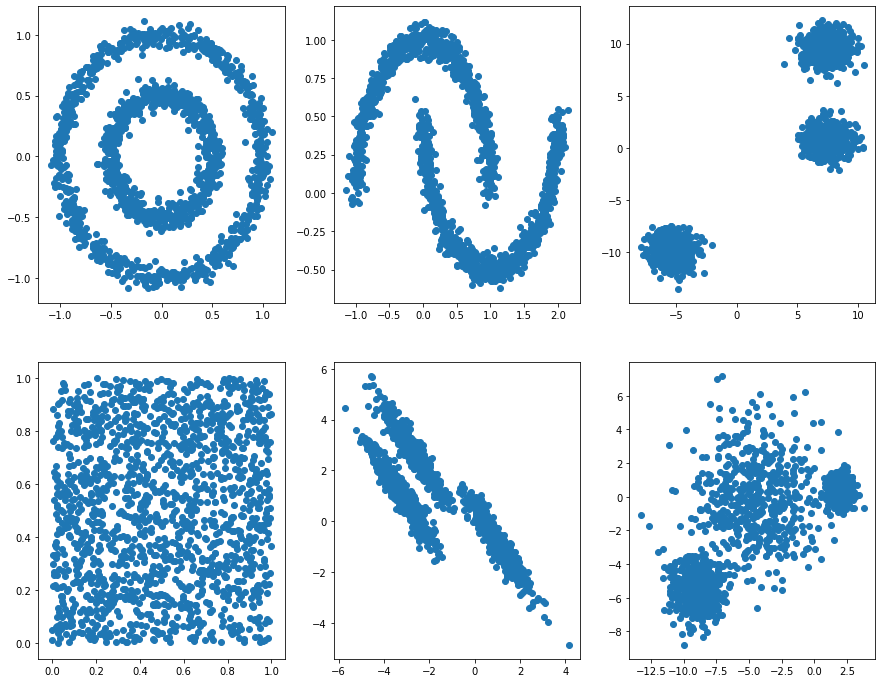

In [13]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 12))

ax1.scatter(A[:,0], A[:,1])
ax2.scatter(B[:,0], B[:,1])
ax3.scatter(C[:,0], C[:,1])
ax4.scatter(D[:,0], D[:,1])
ax5.scatter(E[:,0], E[:,1])
ax6.scatter(F[:,0], F[:,1])


## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

Text(0.5, 0.98, 'K-Means Example')

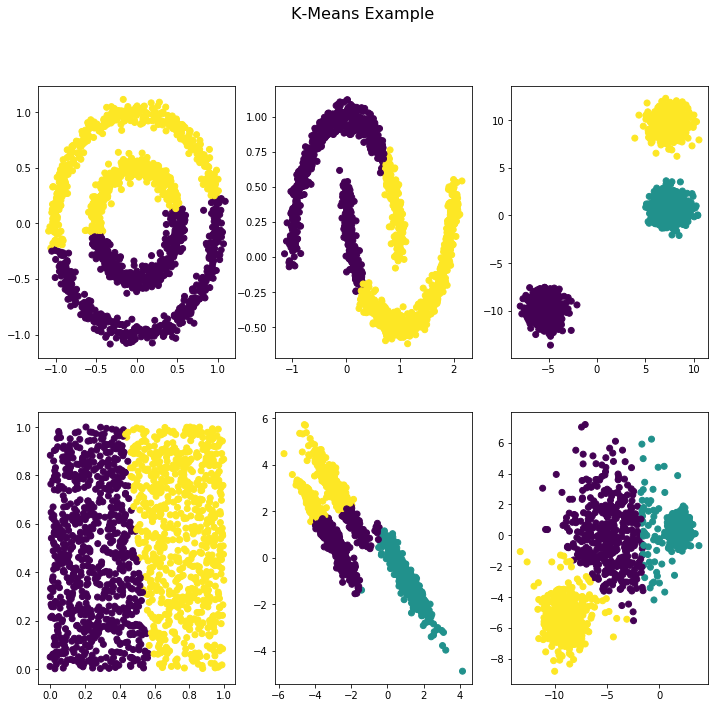

In [56]:
from sklearn.cluster import KMeans

random_state = 42
plt.figure(figsize=(12, 11))

y_A_pred = KMeans(n_clusters=2, init='k-means++', random_state=random_state).fit_predict(A)
y_B_pred = KMeans(n_clusters=2, init='k-means++', random_state=random_state).fit_predict(B)
y_C_pred = KMeans(n_clusters=3, init='k-means++', random_state=random_state).fit_predict(C)
y_D_pred = KMeans(n_clusters=2, init='k-means++', random_state=random_state).fit_predict(D)
y_E_pred = KMeans(n_clusters=3, init='k-means++', random_state=random_state).fit_predict(E)
y_F_pred = KMeans(n_clusters=3, init='k-means++', random_state=random_state).fit_predict(F)

plt.subplot(231)
plt.scatter(A[:, 0], A[:, 1], c=y_A_pred)
plt.subplot(232)
plt.scatter(B[:, 0], B[:, 1], c=y_B_pred)
plt.subplot(233)
plt.scatter(C[:, 0], C[:, 1], c=y_C_pred)
plt.subplot(234)
plt.scatter(D[:, 0], D[:, 1], c=y_D_pred)
plt.subplot(235)
plt.scatter(E[:, 0], E[:, 1], c=y_E_pred)
plt.subplot(236)
plt.scatter(F[:, 0], F[:, 1], c=y_F_pred)
plt.suptitle('K-Means Example', fontsize=16)


## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN


Text(0.5, 0.98, 'DBSCAN Example')

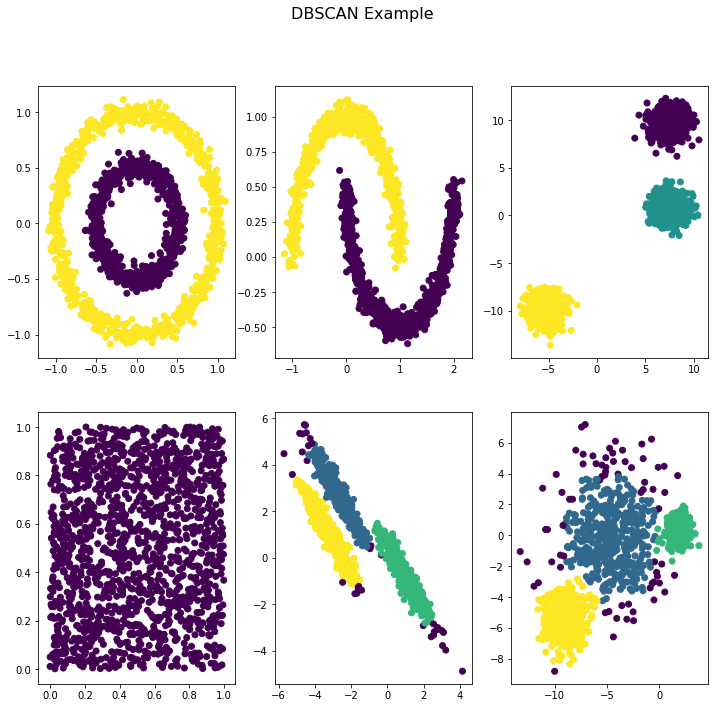

In [58]:
from sklearn.cluster import DBSCAN

random_state = 42
plt.figure(figsize=(12, 11))

db_A = DBSCAN(eps=0.15, min_samples=10).fit(A)
db_B = DBSCAN(eps=0.2, min_samples=10).fit(B)
db_C = DBSCAN(eps=1.5, min_samples=20).fit(C)
db_D = DBSCAN(eps=1.0, min_samples=10).fit(D)
db_E = DBSCAN(eps=0.3, min_samples=8).fit(E)
db_F = DBSCAN(eps=0.8, min_samples=10).fit(F)

plt.subplot(231)
plt.scatter(A[:, 0], A[:, 1], c=db_A.labels_)
plt.subplot(232)
plt.scatter(B[:, 0], B[:, 1], c=db_B.labels_)
plt.subplot(233)
plt.scatter(C[:, 0], C[:, 1], c=db_C.labels_)
plt.subplot(234)
plt.scatter(D[:, 0], D[:, 1], c=db_D.labels_)
plt.subplot(235)
plt.scatter(E[:, 0], E[:, 1], c=db_E.labels_)
plt.subplot(236)
plt.scatter(F[:, 0], F[:, 1], c=db_F.labels_)
plt.suptitle('DBSCAN Example', fontsize=16)
